In [38]:
import pandas as pd
from tqdm import tqdm
from hopfield import *

In [39]:
# n nodes
# k images
# see if the images are fixed pts (not necessarily stable)
max_num_nodes_to_test = 100
remembrance_threshold = 0.05
number_of_trials_per_num_nodes = 20

In [40]:
def check_remembrance(network: Hopfield, image: np.array):
    network.values = image
    updated_values = network.do_synchronous_update()
    hamming_distance = network.hamming_distance(updated_values, image)
    try:
        assert hamming_distance <= int(0.05 * network.n)
        return True
    except AssertionError:
        # print(hamming_distance)
        return False

In [41]:
def check_multiple_remembrances(network: Hopfield, images: list[np.array]):
    for image in images:
        if not check_remembrance(network, image):
            return False
    return True

In [42]:
def find_how_many_images_network_can_store_with_n_nodes(n):
    remembrance_data = []
    network = Hopfield(shape = (n, 1))
    network.train_on_values()
    images_trained_on = [np.array(network.values)]
    remembrance_data.append(check_multiple_remembrances(network, images_trained_on))

    while remembrance_data[-1] is True:
        random_image = network.generate_random_image()
        network.train_on_new(random_image)
        images_trained_on.append(random_image)
        remembrance_data.append(check_multiple_remembrances(network, images_trained_on))

    return len(remembrance_data) - 1

In [43]:
print(find_how_many_images_network_can_store_with_n_nodes(100))

26


In [44]:
num_images_remembered = {n: [] for n in range(2, max_num_nodes_to_test + 1)}

for n in tqdm(range(2, max_num_nodes_to_test + 1)):
    for _ in range(number_of_trials_per_num_nodes):
        num_images_remembered[n].append(find_how_many_images_network_can_store_with_n_nodes(n))

100%|██████████| 99/99 [02:17<00:00,  1.39s/it]


In [45]:
num_images_remembered

{2: [1, 3, 3, 1, 1, 3, 1, 2, 1, 8, 8, 1, 2, 1, 1, 1, 6, 2, 1, 1],
 3: [2, 2, 2, 1, 2, 1, 6, 3, 1, 2, 2, 1, 1, 1, 1, 1, 3, 2, 1, 2],
 4: [1, 4, 3, 1, 2, 3, 2, 3, 2, 2, 1, 1, 3, 1, 2, 3, 3, 1, 1, 3],
 5: [1, 2, 3, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 3],
 6: [3, 3, 2, 2, 1, 1, 1, 3, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2],
 7: [2, 2, 2, 2, 3, 3, 3, 1, 2, 2, 2, 3, 3, 3, 1, 2, 1, 2, 3, 2],
 8: [3, 2, 3, 2, 3, 3, 3, 2, 4, 5, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2],
 9: [2, 2, 1, 4, 3, 4, 3, 3, 3, 3, 2, 3, 4, 2, 3, 2, 2, 4, 3, 4],
 10: [2, 4, 3, 3, 4, 2, 3, 3, 4, 3, 3, 3, 2, 3, 4, 2, 3, 2, 2, 3],
 11: [3, 2, 3, 4, 2, 3, 3, 2, 3, 3, 4, 5, 4, 3, 2, 2, 2, 2, 3, 4],
 12: [4, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 4, 2, 3, 3, 4, 2, 2, 3, 3],
 13: [3, 4, 3, 5, 3, 3, 5, 4, 5, 4, 3, 3, 4, 3, 3, 5, 3, 3, 3, 3],
 14: [3, 4, 3, 3, 4, 4, 3, 5, 4, 3, 2, 4, 4, 3, 3, 5, 3, 4, 3, 3],
 15: [3, 3, 4, 5, 4, 6, 5, 3, 3, 2, 5, 3, 3, 2, 2, 4, 5, 2, 4, 4],
 16: [4, 5, 3, 3, 2, 4, 5, 4, 3, 4, 4, 3, 5, 5, 5, 3, 3, 3, 5, 3],
 17

[0.21524985 0.61114677]


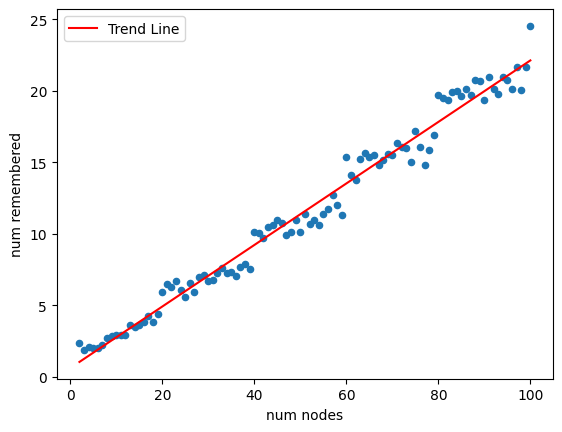

In [50]:
interpreted_data = {"num remembered": [sum(num_images_remembered[n]) / len(num_images_remembered[n]) for n in num_images_remembered.keys()], "num nodes": [n for n in num_images_remembered.keys()]}
dataframe = pd.DataFrame(interpreted_data)

fit = np.polyfit(pd.to_numeric(interpreted_data["num nodes"]), pd.to_numeric(interpreted_data["num remembered"]), 1)
line = np.poly1d(fit)
dataframe.insert(1, "Trend Line", line(pd.to_numeric(interpreted_data["num nodes"])))
# print(interpreted_data)
# print(dataframe)
ax = dataframe.plot(x="num nodes", y="num remembered", kind="scatter")
dataframe.plot(x="num nodes", y="Trend Line", ax=ax, color="Red")
print(fit)